<a href="https://colab.research.google.com/github/lukmanprasetyo/H8_KS009/blob/master/Tugas_pytn_ks09_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Kalau kita buat listnya/summary dari perintah di module kode id :

A. Area Plot (a)
B. Histogram (a)
C. Bar Chart (a)
D. Pie Chart (a)
E. Box Plot  (a)
F. Scatter Plot (a)
G. Word Clouds
H. Folium Maps
I. Overall Analysis

*for each plot (A - F):
- Question/what data we want to visualize
- Pre-processing as needed
- (a)or analysis :: Conclusion / Kesimpulan
```

---
# A. Area Plot

:**Question**  // *Melakukan analisa 5 negara teratas yang mealkukan imigrasi ke kanada* 

**Pre-processing as needed** // *Student melakukan preproses dataset sebelum menerapkan visualisasi*

In [46]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
dataset_url = "https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true"

In [19]:
df_can = pd.read_excel(dataset_url,
                  	sheet_name='Canada by Citizenship',
                  	skiprows=range(20),
                  	skipfooter=2)

print('Data downloaded and read into a dataframe')

Data downloaded and read into a dataframe


In [20]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [21]:
print(df_can.shape)

(195, 43)


In [22]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [23]:
all(isinstance(column, str) for column in df_can.columns)

False

In [24]:
df_can.columns = list(map(str, df_can.columns))
all(isinstance(column, str) for column in df_can.columns)

True

In [25]:
df_can.rename (columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [26]:
df_can.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [27]:
df_can.set_index('Country', inplace=True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [28]:
df_can['Total'] = df_can.sum(axis=1)

df_can.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [29]:
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [30]:
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [31]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


**Create data visualization** // *Mengimplementasikan area plot menggunakan matplotlib dengan data yang relevan dan sesuai dengan kegunaan plot/grafik*

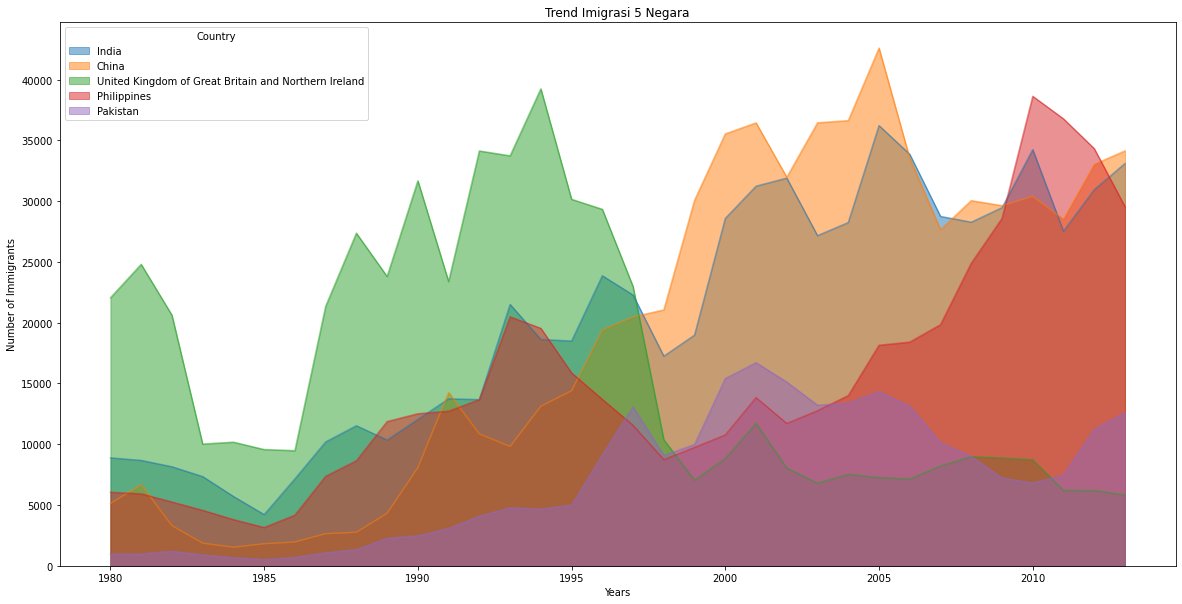

In [74]:
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10),
             )

plt.title('Trend Imigrasi 5 Negara')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Conclusion** // *Menarik informasi/kesimpulan berdasarkan area plot yang telah student buat*



In [34]:
# Kesimpulan berdasarkan data diatas yaitu 5 negara teratas yang melakukan imigrasi ke canada berasal dari negara india, china, UK, filipina dan pakistan

---
# B. Histogram

In [38]:
# Question:Bagaimana distribusi imigrasi Denmark, Norwegia, dan Swedia selama tahun 1980 - 2013 ?

In [39]:
# 1. pre-processing as needed

In [35]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [40]:
# 2. create visualization

In [42]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


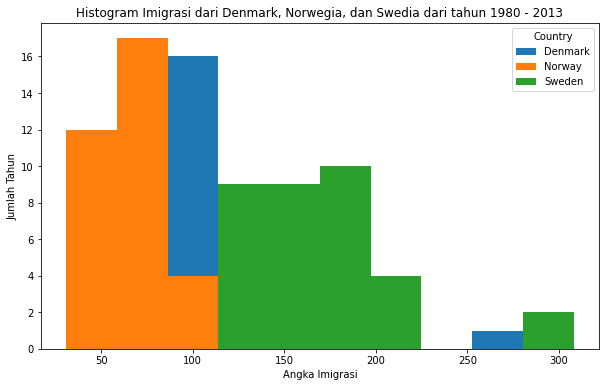

In [48]:
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram Imigrasi dari Denmark, Norwegia, dan Swedia dari tahun 1980 - 2013')
plt.ylabel('Jumlah Tahun')
plt.xlabel('Angka Imigrasi')

plt.show()

In [88]:
# 3. conclusion ....
#Berdasarkan data diatas, diketahui jika jumlah dari tahun ke tahun yang melakukan imigrasi bertambah

---
# C. Bar Chart


In [ ]:
# Question: Bagaimana jumlah imigran Islandia ke Kanada dari tahun 1980 hingga 2013.

In [49]:
# 1. pre-processing as needed


In [51]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

In [52]:
# 2. create visualization

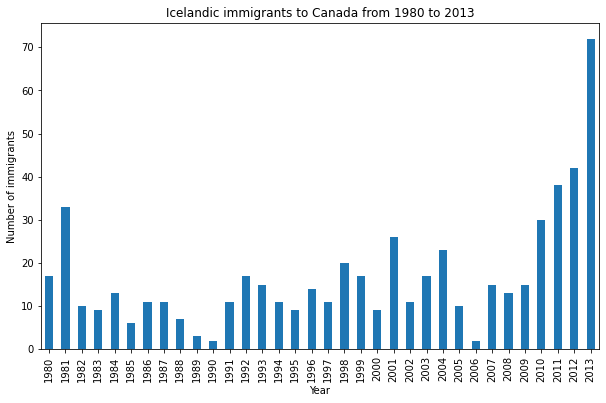

In [53]:
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Number of immigrants') 
plt.title('Icelandic immigrants to Canada from 1980 to 2013') 

plt.show()

In [ ]:
# 3. conclusion 
# Kesimpulan berdasarkan data diatasm jumlah imigran yang berasal dari irlandia di negara kanada terus mengalami peningkatan

---
# D. Pie Chart

In [ ]:
# Question: Melakukan pengelompokan imigran baru berdasarkan benua dari periode 1980 sampai 2013 ?

In [ ]:
# 1. pre-processing as needed

In [54]:
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


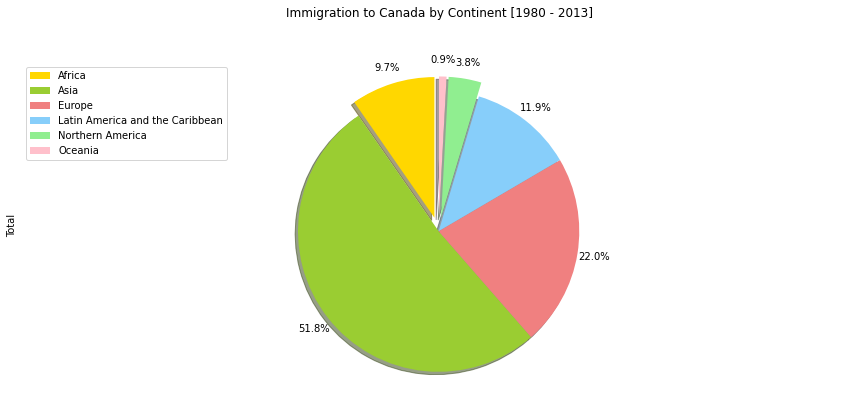

In [55]:
# 2. create visualization
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,     
                            colors=colors_list,  
                            explode=explode_list 
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# menambahkan kalimat
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

In [ ]:
# 3. conclusion ....
#Berdasarkan Pie diatas, diketahui presentasi imigran yang melakukan imigrasi ke negara canada dari tahun 1980 - 2013

---
# E. Box Plot

In [ ]:
# Question: Bandingkan sebaran jumlah pendatang baru dari India dan China periode 1980 - 2013 ?

In [56]:
# 1. pre-processing as needed

In [57]:
df_CI = df_can.loc[(['China', 'India']), years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [58]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


In [ ]:
# 2. create visualization

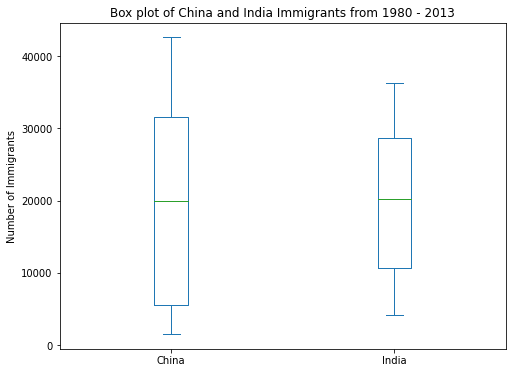

In [59]:
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of China and India Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [63]:
# 3. conclusion ....
#Kesimpulan, berdasarkan Box plot diatas. Diketahui jumlah imigran cina lebih tinggi dibandingkan india

---
# F. Scatter Plot

In [ ]:
# Question: mari kita visualisasikan tren total imigrasi ke Kanada (Semua negara) untuk tahun 1980 - 2013.

In [ ]:
# 1. pre-processing as needed

In [60]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)

df_tot.reset_index(inplace = True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [61]:
# 2. create visualization

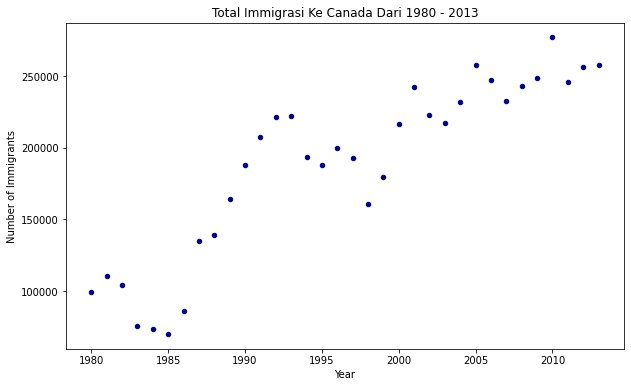

In [62]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigrasi Ke Canada Dari 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [ ]:
# 3. conclusion ....
#Kesimpulan dari data diatas, diketahui terjadinya peningkatan imigrasi ke canada dari 1980 - 2013

# **G. Word Clouds**

In [62]:
# Question: mari kita visualisasikan dalam bentuk word clouds tren total imigrasi ke Kanada (Semua negara) untuk tahun 1980 - 2013.

In [ ]:
# 1. pre-processing as needed

In [64]:
from wordcloud import WordCloud, STOPWORDS

In [83]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [84]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [85]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # Mengecek nama negara dalam satu kata
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# membuat tampilan
word_string

'India India India India India India India India India China China China China China China China China China Philippines Philippines Philippines Philippines Philippines Philippines Philippines Pakistan Pakistan Pakistan Poland Lebanon France Jamaica Romania Haiti Guyana Portugal Egypt Morocco Colombia '

In [86]:
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


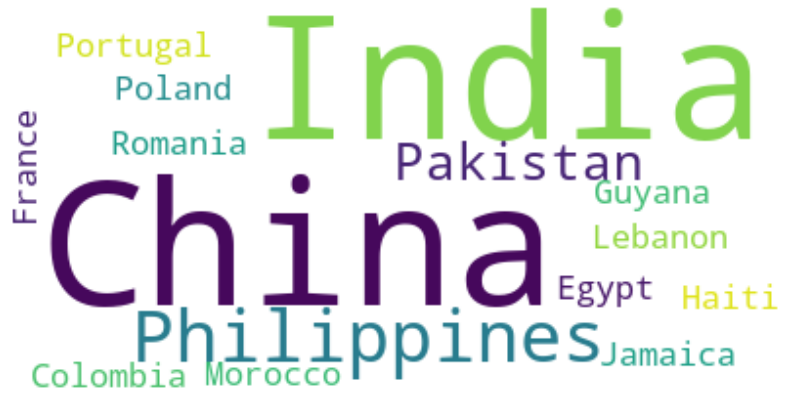

In [87]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Kesimpulan**
Diketahui jika jumlah imigram terbesar berasal dari china, india, philipina yang bermigrasi ke kanada dalam rentang waktu 1980-2013

# **Analysis**

Secara keseluruhan dapat disimpulkan bahwa
- Telah terjadi peningkatan jumlah imigran dari tahun 1980-2013
- Berdasarkan data diketahui jika jumlah imigran terbesar berasal dari negara china dan india 